# import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline

# Read Dataset and show some information

In [2]:
data_path = "C:\\Users\\MOHAMED\\Desktop\\regression_data.xls"

data = pd.read_excel(data_path)
data=(data-data.mean())/data.std()
data.head()

,AT,V,AP,RH,PE
0,-0.629486,-0.987245,1.820393,-0.009519,0.521181
1,0.741870,0.681010,1.141803,-0.974570,-0.585634
2,-1.951195,-1.172956,-0.185068,1.289772,2.003574
3,0.162197,0.237191,-0.508366,0.228148,-0.462003
4,-1.185007,-1.322470,-0.678435,1.596616,1.144606


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
data.describe()

,AT,V,AP,RH,PE
count,9.568000e+03,9.568000e+03,9.568000e+03,9.568000e+03,9.568000e+03
mean,-6.851427e-15,-1.758375e-14,-4.731121e-13,7.452041e-15,-5.175128e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.394001e+00,-2.277782e+00,-3.429840e+00,-3.270418e+00,-1.998302e+00
25%,-8.240528e-01,-9.888188e-01,-7.003249e-01,-6.836503e-01,-8.563317e-01
50%,9.309243e-02,-1.751513e-01,-5.372787e-02,1.141090e-01,-1.649388e-01
75%,8.143295e-01,9.627242e-01,6.736938e-01,7.890966e-01,8.241047e-01
max,2.342681e+00,2.144667e+00,3.374584e+00,1.839077e+00,2.425441e+00


In [5]:
correlation__matrix = data.corr()
print(correlation__matrix)

          AT         V        AP        RH        PE
AT  1.000000  0.844107 -0.507549 -0.542535 -0.948128
V   0.844107  1.000000 -0.413502 -0.312187 -0.869780
AP -0.507549 -0.413502  1.000000  0.099574  0.518429
RH -0.542535 -0.312187  0.099574  1.000000  0.389794
PE -0.948128 -0.869780  0.518429  0.389794  1.000000


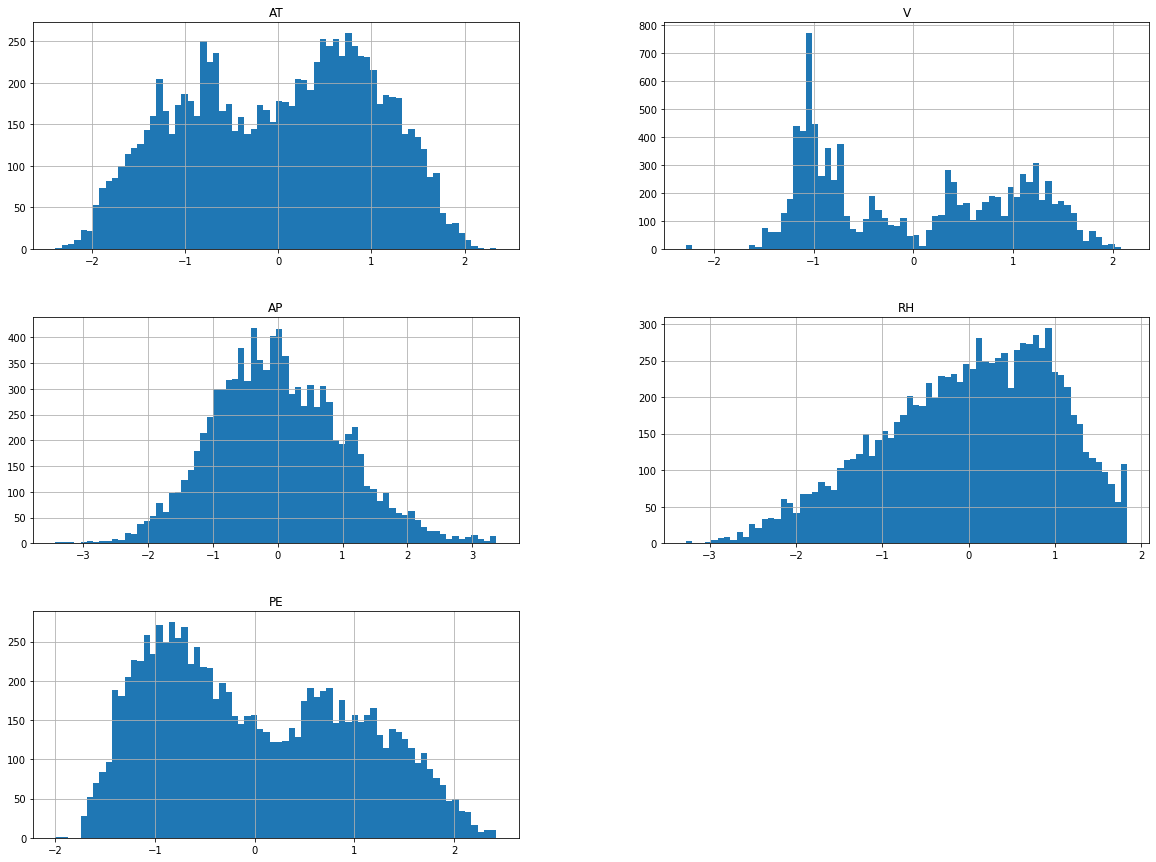

In [6]:
data.hist(bins=70, figsize=(20,15))
plt.show()

# Create Dataset

In [7]:
data_all = data.iloc[:, 0:4]
data_Y = data.iloc[:, -1]

In [8]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(data_all,data_Y, test_size=0.5, random_state=42, shuffle= True)

X_train_all = X_train_all.to_numpy()
y_train_all = y_train_all.to_numpy()
X_test_all = X_test_all.to_numpy()
y_test_all = y_test_all.to_numpy()


# Train Model

In [9]:
Reg_all = LinearRegression()
Reg_all.fit(X_train_all, y_train_all)

print('Done !')

Done !


# Prediction

In [10]:

prediction_all = Reg_all.predict(X_train_all)
Error_train_all = ((mean_squared_error(y_train_all, prediction_all)))
print("L'erreur du training pour all est: {}\n".format(Error_train_all))

y_pred_all = Reg_all.predict(X_test_all)
Error_test_all = ((mean_squared_error(y_test_all, y_pred_all)))
print("L'erreur du Testing pour all est: {}\n".format(Error_test_all))

L'erreur du training pour all est: 0.06937145183785773

L'erreur du Testing pour all est: 0.07329732918874984



# Coefficients

In [11]:
print('The coefficients AT_V:')
print('B0:', Reg_all.intercept_)
print('Bk:', Reg_all.coef_)
print('\n')

b_all = np.hstack([Reg_all.intercept_, Reg_all.coef_])
predictors_names_all =  list(data[['AT','V','AP','RH']].columns)
predictors_names_all.insert(0, "X0")
df_all = pd.DataFrame(zip(predictors_names_all,b_all), index=["B0", "B1","B2","B3","B4"], columns = ['features', 'Coefficients'])

The coefficients AT_V:
B0: -0.0024646945902916124
Bk: [-0.86936437 -0.17362819  0.01727863 -0.13400696]


